In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [59]:
import pandas as pd
df=pd.read_csv('D:/mclearning/Train.csv')
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [60]:
#Encoding the data
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df=df.apply(le.fit_transform)

In [61]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,284,1,664,4,5592,9,4,1,0,1,2540
1,8,57,2,880,14,473,3,8,1,2,2,422
2,662,375,1,715,10,2901,9,4,1,0,1,1639
3,1121,392,2,0,6,4227,0,3,3,2,0,670
4,1297,265,1,0,9,627,1,1,0,2,1,865


In [62]:
sorted(df['Item_Fat_Content'].unique())

[0, 1, 2, 3, 4]

In [63]:
sorted(df['Outlet_Location_Type'].unique())

[0, 1, 2]

In [64]:
df['Outlet_Location_Type'].value_counts()

Outlet_Location_Type
2    3350
1    2785
0    2388
Name: count, dtype: int64

In [65]:
df['Item_Fat_Content'].value_counts()

Item_Fat_Content
1    5089
2    2889
0     316
4     117
3     112
Name: count, dtype: int64

In [66]:
# # Dividing dependent and independent variables
X = df.drop("Outlet_Location_Type", axis=1)
y = df["Outlet_Location_Type"]

In [67]:
# Sampling
from imblearn.over_sampling import SMOTE 
from collections import Counter

sampler = SMOTE()
X, y = sampler.fit_resample(X, y)

print('SMOTE {}'.format(Counter(y)))

SMOTE Counter({0: 3350, 2: 3350, 1: 3350})


In [68]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [69]:
# Feature Scaling

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [70]:
from sklearn.linear_model import LogisticRegression  

classifier= LogisticRegression(random_state=0)  
lr_model=classifier.fit(X_train, y_train)
y_pred=lr_model.predict(X_test)

In [71]:
# Accuracy = TP+TN/TP+FP+FN+TN
# Precision = TP/TP+FP
# Recall = TP/TP+FN
#F1 Score = 2*(Recall * Precision) / (Recall + Precision)


from sklearn.metrics import classification_report, confusion_matrix 
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       868
           1       1.00      0.99      1.00       836
           2       0.99      1.00      1.00       809

    accuracy                           1.00      2513
   macro avg       1.00      1.00      1.00      2513
weighted avg       1.00      1.00      1.00      2513



Text(50.722222222222214, 0.5, 'Actual Label')

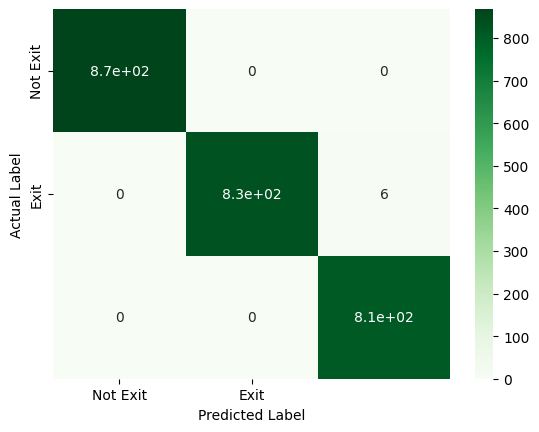

In [72]:
x_axis_labels = ['Not Exit','Exit']
y_axis_labels = ['Not Exit','Exit']

confusion_m=confusion_matrix(y_test,y_pred)
sns.heatmap(confusion_m, annot=True,cmap='Greens', xticklabels=x_axis_labels, yticklabels=y_axis_labels)

plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')

In [73]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
dt_model = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = dt_model.predict(X_test)

In [74]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       868
           1       1.00      1.00      1.00       836
           2       1.00      1.00      1.00       809

    accuracy                           1.00      2513
   macro avg       1.00      1.00      1.00      2513
weighted avg       1.00      1.00      1.00      2513



Text(50.722222222222214, 0.5, 'Actual Label')

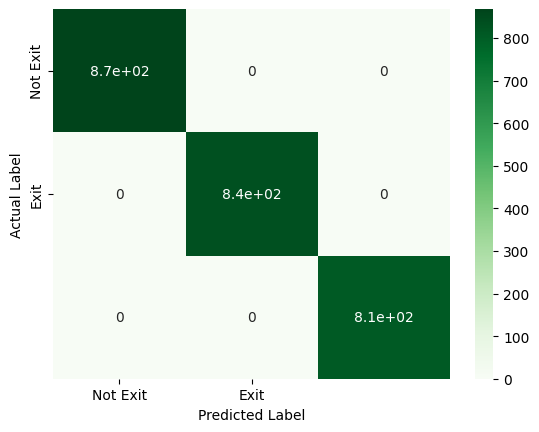

In [75]:
x_axis_labels = ['Not Exit','Exit']
y_axis_labels = ['Not Exit','Exit']

confusion_m=confusion_matrix(y_test,y_pred)
sns.heatmap(confusion_m, annot=True,cmap='Greens', xticklabels=x_axis_labels, yticklabels=y_axis_labels)

plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')

In [76]:
from sklearn.neighbors import KNeighborsClassifier

clf= KNeighborsClassifier(n_neighbors=25)

# Train the model using the training sets
knn_model=clf.fit(X_train,y_train)

y_pred=knn_model.predict(X_test)

In [77]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       868
           1       1.00      1.00      1.00       836
           2       1.00      1.00      1.00       809

    accuracy                           1.00      2513
   macro avg       1.00      1.00      1.00      2513
weighted avg       1.00      1.00      1.00      2513



Text(50.722222222222214, 0.5, 'Actual Label')

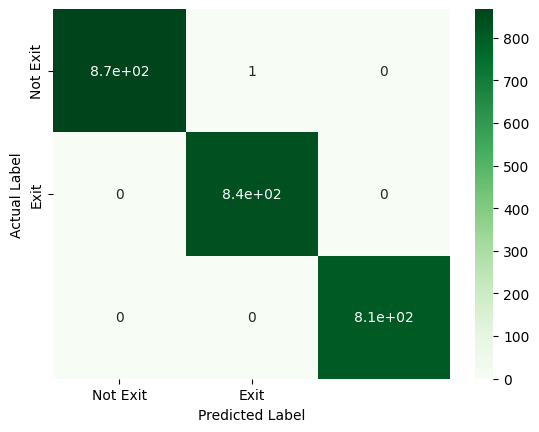

In [78]:
x_axis_labels = ['Not Exit','Exit']
y_axis_labels = ['Not Exit','Exit']

confusion_m=confusion_matrix(y_test,y_pred)
sns.heatmap(confusion_m, annot=True,cmap='Greens', xticklabels=x_axis_labels, yticklabels=y_axis_labels)

plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')

In [79]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=100,random_state=0)
rf_model=clf.fit(X_train, y_train)
y_pred=rf_model.predict(X_test)

In [80]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       868
           1       1.00      1.00      1.00       836
           2       1.00      1.00      1.00       809

    accuracy                           1.00      2513
   macro avg       1.00      1.00      1.00      2513
weighted avg       1.00      1.00      1.00      2513



In [81]:
confusion_m=confusion_matrix(y_test,y_pred)
confusion_m

array([[868,   0,   0],
       [  0, 836,   0],
       [  0,   0, 809]], dtype=int64)

Text(50.722222222222214, 0.5, 'Actual Label')

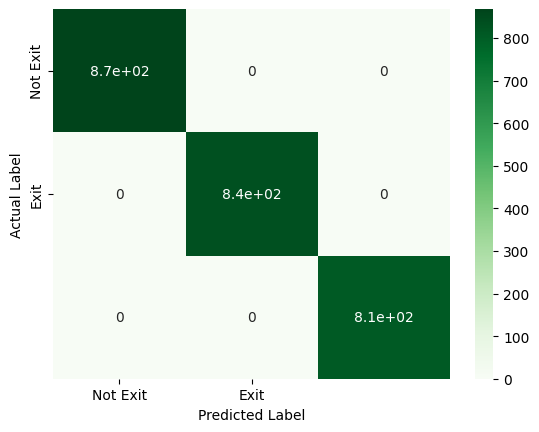

In [82]:
x_axis_labels = ['Not Exit','Exit']
y_axis_labels = ['Not Exit','Exit']

confusion_m=confusion_matrix(y_test,y_pred)
sns.heatmap(confusion_m, annot=True,cmap='Greens', xticklabels=x_axis_labels, yticklabels=y_axis_labels)

plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')

In [83]:
import pickle
pickle.dump(rf_model, open('pickle.pkl','wb'))

In [84]:
# Loading model to compare the results

model = pickle.load(open('pickle.pkl','rb'))
print(rf_model.predict([[8,57,2,880,14,473,3,8,1,2,422]]))

[2]
